<a href="https://colab.research.google.com/github/Sarath-Mohan9469545/computing_lab_exp/blob/main/DL_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/dl_dataset.zip

Archive:  /content/dl_dataset.zip
  inflating: dl_dataset/img_1.jpg    
  inflating: dl_dataset/img_10.jpg   
  inflating: dl_dataset/img_11.jpg   
  inflating: dl_dataset/img_12.jpg   
  inflating: dl_dataset/img_13.jpg   
  inflating: dl_dataset/img_14.jpg   
  inflating: dl_dataset/img_15.jpg   
  inflating: dl_dataset/img_16.jpg   
  inflating: dl_dataset/img_17.jpg   
  inflating: dl_dataset/img_18.jpg   
  inflating: dl_dataset/img_19.jpg   
  inflating: dl_dataset/img_2.jpg    
  inflating: dl_dataset/img_20.jpg   
  inflating: dl_dataset/img_3.jpg    
  inflating: dl_dataset/img_4.jpg    
  inflating: dl_dataset/img_5.jpg    
  inflating: dl_dataset/img_6.jpg    
  inflating: dl_dataset/img_7.jpg    
  inflating: dl_dataset/img_8.jpg    
  inflating: dl_dataset/img_9.jpg    


In [20]:
!zip -r /content/dataset_test.zip /content/dataset_test

  adding: content/dataset_test/ (stored 0%)
  adding: content/dataset_test/archa/ (stored 0%)
  adding: content/dataset_test/archa/img_16.jpg (deflated 0%)
  adding: content/dataset_test/archa/img_12.jpg (deflated 0%)
  adding: content/dataset_test/archa/img_4.jpg (deflated 0%)
  adding: content/dataset_test/archa/img_7.jpg (deflated 0%)
  adding: content/dataset_test/archa/img_6.jpg (deflated 0%)
  adding: content/dataset_test/archa/img_13.jpg (deflated 0%)
  adding: content/dataset_test/archa/img_14.jpg (deflated 0%)
  adding: content/dataset_test/archa/img_8.jpg (deflated 0%)
  adding: content/dataset_test/archa/img_5.jpg (deflated 0%)
  adding: content/dataset_test/archa/img_2.jpg (deflated 0%)
  adding: content/dataset_test/archa/img_1.jpg (deflated 0%)
  adding: content/dataset_test/archa/img_3.jpg (deflated 0%)
  adding: content/dataset_test/archa/img_20.jpg (deflated 0%)
  adding: content/dataset_test/archa/img_15.jpg (deflated 0%)
  adding: content/dataset_test/archa/img_18.jp

In [19]:
!unzip /content/sarathface.zip

Archive:  /content/sarathface.zip
  inflating: sarath face/IMG_20220715_150848.jpg  
  inflating: sarath face/IMG_20220715_150848_1.jpg  
  inflating: sarath face/IMG_20220715_150849.jpg  
  inflating: sarath face/IMG_20220715_150850.jpg  
  inflating: sarath face/IMG_20220715_150850_1.jpg  
  inflating: sarath face/IMG_20220715_150851.jpg  
  inflating: sarath face/IMG_20220715_150852.jpg  
  inflating: sarath face/IMG_20220715_150852_1.jpg  
  inflating: sarath face/IMG_20220715_150853.jpg  
  inflating: sarath face/IMG_20220715_150858.jpg  
  inflating: sarath face/IMG_20220715_150859.jpg  
  inflating: sarath face/IMG_20220715_150903.jpg  
  inflating: sarath face/IMG_20220715_150904.jpg  
  inflating: sarath face/IMG_20220715_150907.jpg  
  inflating: sarath face/IMG_20220715_150908.jpg  
  inflating: sarath face/IMG_20220715_150912.jpg  
  inflating: sarath face/IMG_20220715_150913.jpg  
  inflating: sarath face/IMG_20220715_150917.jpg  
  inflating: sarath face/IMG_20220715_1509

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Augmentor
# Passing the path of the image directory
p = Augmentor.Pipeline("/content/sarathface")
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(100)

Initialised with 30 image(s) found.
Output directory set to /content/sarathface/output.

Processing <PIL.Image.Image image mode=RGB size=3008x6528 at 0x7FC656667B50>: 100%|██████████| 100/100 [03:04<00:00,  1.85s/ Samples]


In [ ]:
p = Augmentor.Pipeline("/content/dl_dataset")
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(100)

Initialised with 20 image(s) found.
Output directory set to /content/dl_dataset/output.

Processing <PIL.Image.Image image mode=RGB size=468x960 at 0x7FC64E75EFD0>: 100%|██████████| 100/100 [00:15<00:00,  6.36 Samples/s]


In [22]:
!rmdir /content/dataset_test/.ipynb_checkpoints

In [23]:
!rmdir /content/dataset_train/.ipynb_checkpoints

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [38]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)


In [39]:
train_dir="/content/dataset_train"
val_dir="/content/dataset_test"

In [46]:
train_data=train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=1,seed=42)
valid_data=valid_datagen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='binary',batch_size=1,seed=42)

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [65]:
model_1=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(2,activation="softmax")
                                    
                                    
                                    
])

In [66]:
model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [67]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [68]:
history_1=model_1.fit(train_data,
                      epochs=50,
                      steps_per_epoch=50,
                      validation_data=valid_data,
                       callbacks=[callback]
                      )

Epoch 1/50
50/50 [==============================] - 14s 279ms/step - loss: 0.7966 - accuracy: 0.6000 - val_loss: 0.5697 - val_accuracy: 1.0000
Epoch 2/50
50/50 [==============================] - 14s 278ms/step - loss: 0.2208 - accuracy: 0.9600 - val_loss: 0.0608 - val_accuracy: 0.9600
Epoch 3/50
50/50 [==============================] - 14s 282ms/step - loss: 0.0334 - accuracy: 0.9800 - val_loss: 0.8224 - val_accuracy: 0.8400
Epoch 4/50
50/50 [==============================] - 14s 289ms/step - loss: 0.1923 - accuracy: 0.9600 - val_loss: 8.1871e-05 - val_accuracy: 1.0000
Epoch 5/50
50/50 [==============================] - 14s 270ms/step - loss: 0.2329 - accuracy: 0.9400 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 6/50
50/50 [==============================] - 13s 263ms/step - loss: 0.1604 - accuracy: 0.9400 - val_loss: 0.0224 - val_accuracy: 1.0000


In [84]:
from tensorflow.keras.preprocessing import image
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_1.predict(X)
  val=str(val)
  print(val)
  #print(val[[0]])
  if val=="[[1. 0.]]":
    plt.xlabel("archa",fontsize=30)
  elif val=="[[0. 1.]]":
    plt.xlabel("sarath",fontsize=30)

[[1. 0.]]


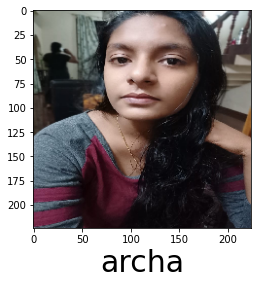

In [87]:
predictImage("/content/dataset_test/archa/img_11.jpg")

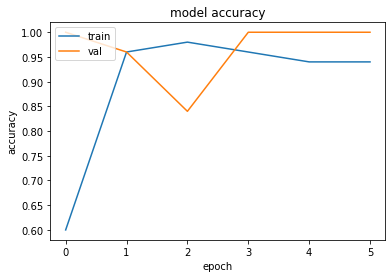

In [88]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

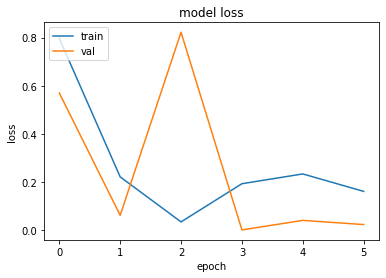

In [89]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [90]:

!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 22.6 MB/s 


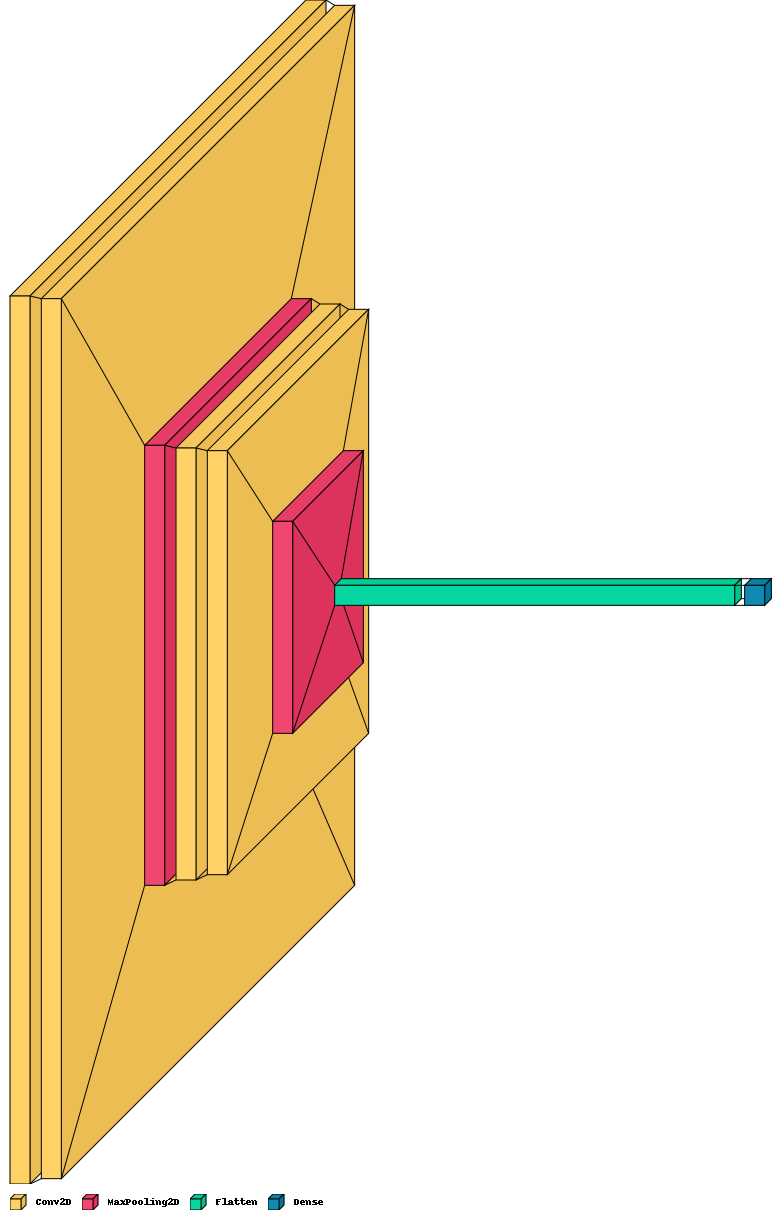

In [91]:
import visualkeras
visualkeras.layered_view(model_1,legend=True)